# Aryan Rajoria E19CSE319
### Lab practice 1 OpenCV

<h1>Practice Session 1</h1>


Estimated time needed: **30** minutes


<h2>Objectives</h2>


In today's lab, you will apply geometric transformations and other operations to an image. The questions are written in bold, mention their corresponding answers below them.


**Download any image for the lab and save it to your drive folder.** 


We will import the following:


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
image_dir = '/work/cat.jpg'
img = cv2.imread(image_dir)

First, let's define a helper function to plot  image on colab. This function will be used repeatedly in this notebook to showcase the results.


In [ ]:
def plt_imshow(image, title=''):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

#Geometric Transformations


Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


**Create a grayscale image of size 6x6, Set Boundary Pixels to Black and Remaining Pixels to white. Display the Image.**

In [ ]:
from cv2 import warpAffine

(977, 980)


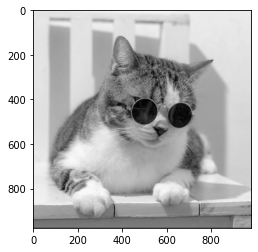

In [ ]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(grayscale.shape)
# grayscale[0, :] = 0
# grayscale[:, 0] = 0
# grayscale[:, -1]= 0
# grayscale[-1, :] = 0
# plt.imshow(grayscale, cmap='gray')

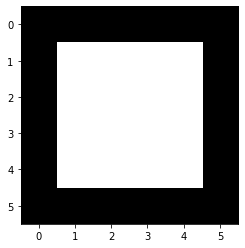

In [ ]:
border_img = (np.ones([6,6]).astype(np.uint8))*255
border_img[0, :] = 0
border_img[:, 0] = 0
border_img[-1, :] = 0
border_img[:, -1] = 0

plt.imshow(border_img, cmap='gray')

We can rescale along a specific axis:

*   `fx`: scale factor along the horizontal axis
*   `fy`: scale factor along the vertical axis


In [ ]:
fx = 2
fy = 1

**Resize the above image using the nearest pixel interpolation. Resize the image with scale factor 1 along vertical axis and 2 along horizontal axis. Display the resultant image.**

In [ ]:
dim = [ 
    int(grayscale.shape[1] * fx),
    int(grayscale.shape[0] * fy)
 ]
gray_re = cv2.resize(grayscale, dim, interpolation= cv2.INTER_LINEAR)

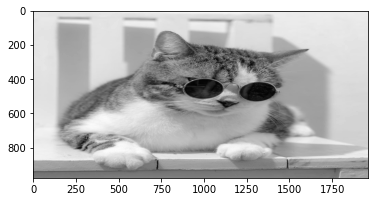

In [ ]:
plt.imshow(gray_re, cmap='gray')

In [ ]:
gray_re.shape

(977, 1960)

**Upload an image of your choice and display it here.**

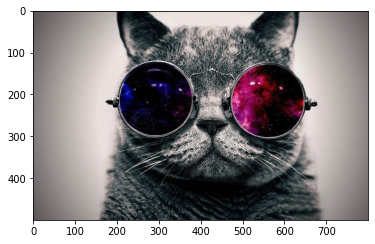

In [ ]:
image_dir = '/work/cat2.jpg'
img = cv2.imread(image_dir)
plt_imshow(img)

**Scale the horizontal axis by two and leave the vertical axis as is. Use inter cubic interpolation.**


In [ ]:
dim = [ 
    int(img.shape[1] * fx),
    int(img.shape[0] * fy)
 ]
img_re = cv2.resize(img, dim, interpolation= cv2.INTER_CUBIC)

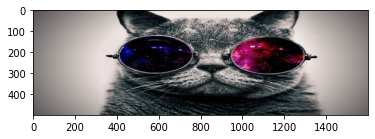

In [ ]:
plt_imshow(img_re)

**Now scale the vertical axis by four.**


In [ ]:
dim = [ 
    int(img_re.shape[1] * 1),
    int(img_re.shape[0] * 4)
 ]
img_re = cv2.resize(img_re, dim, interpolation= cv2.INTER_CUBIC)

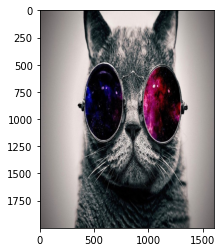

In [ ]:
plt_imshow(img_re)

**Shrink the image by setting the scaling factor to a real number between 0 and 1.**


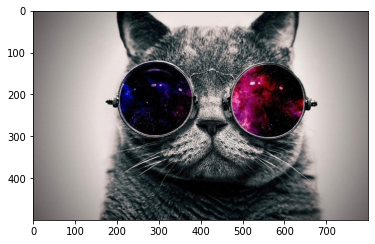

In [ ]:
dim = [
    int(img_re.shape[1] * 0.5),
    int(img_re.shape[0] * 0.25)
]
img_re = cv2.resize(img_re, dim, interpolation= cv2.INTER_LINEAR)
plt_imshow(img_re)

**Instead of using scaling factors, specify the number of rows and columns of the resultant image and resize. Display both original and resized image.**


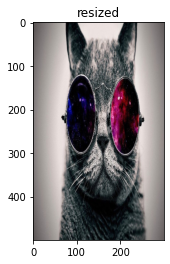

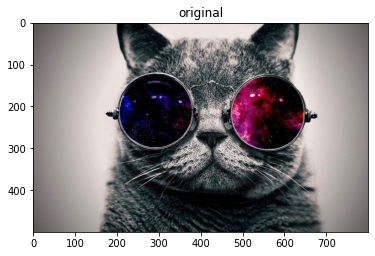

In [ ]:
img_re = cv2.resize(img, [300, 500], interpolation= cv2.INTER_LINEAR)
plt_imshow(img_re, 'resized')
plt_imshow(img, 'original')

## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

**Upload an image and shift the image 100 pixels horizontally by constructing transformation matrix.**


In [ ]:


tx = 100
ty = 0
M = [
    [1,0,tx],
    [0,1,ty]
]
M = np.array(M, dtype='float64')

h, w, _ = img.shape

In [ ]:
img_trans = cv2.warpAffine(img, M, dsize=(w, h))

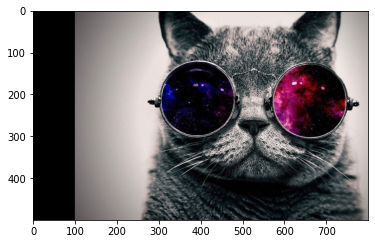

In [ ]:
plt_imshow(img_trans)

## Rotation


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


**Rotate your uploaded image by 45 degrees.**


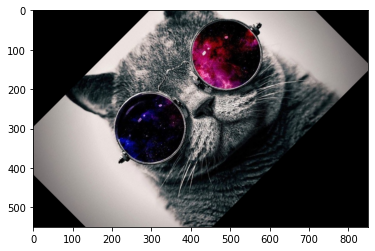

In [ ]:
M = cv2.getRotationMatrix2D(center=(w/2, h/2), angle=45, scale=1)

img_rot = warpAffine(img, M, dsize=(w+50, h+50))
plt_imshow(img_rot)


In [ ]:
print(img_rot.dtype)

uint8


## Other Mathematical Operations

**Upload an image and increase the brightness of the image by applying any suitable mathematical operation. Display the original and brihtened image.**


In [ ]:
ones = np.ones(img.shape)
ones = ones*50
ones = ones.astype(np.uint8)

uint8


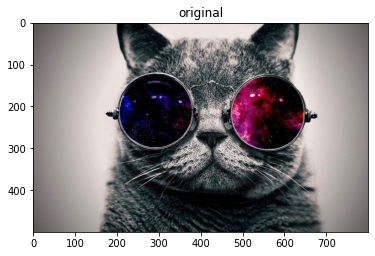

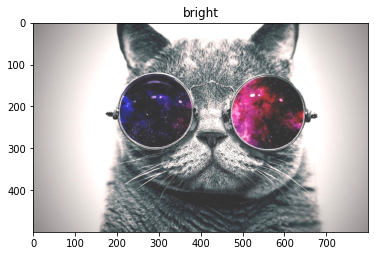

In [ ]:
img_bri = cv2.add(img, ones)
img_bri = img_bri.astype(np.uint8)
print(img_bri.dtype)
plt_imshow(img, 'original')
plt_imshow(img_bri, 'bright')

**Generate an array of random noises with the same shape and data type as your input image. This noise array can contain any random values.**


In [ ]:
noise = np.random.normal(0, 10, img.shape)
noise

array([[[  8.28161074,  -2.86709141,  -0.47499995],
        [  5.1881973 ,  -4.30542023,   1.09012004],
        [ 21.44093078,   6.11630546, -12.01021345],
        ...,
        [  4.65041745,  -4.27827326,  -9.4128455 ],
        [ 12.70387245, -10.38921475,   5.81212219],
        [  0.20490438,   8.92320495,  15.77971078]],

       [[ -5.70760568, -21.77761561,   6.63237355],
        [ -7.11437343,   4.51094124, -11.67003465],
        [  0.28674339,   3.36507991,  10.00660545],
        ...,
        [  6.35445701, -27.93284851,  -6.13618725],
        [  6.37848074,   9.51150262,  -1.09342708],
        [ 14.79364268,  -3.44964949,  -1.85413571]],

       [[  1.02149896,  -8.06086831,  -9.82694096],
        [  9.20915535,  -8.21386107,  -3.87823349],
        [-15.10839132,  -2.79003404,  -2.8353285 ],
        ...,
        [-10.64313656, -13.97935338,   8.50619358],
        [-13.52667312,  13.59876262,  -9.79711491],
        [  2.11338239,  -1.86719831,  -8.31444779]],

       ...,

      

**Add the generated noise to the image and plot the result. Observe the original and corrupted image.**


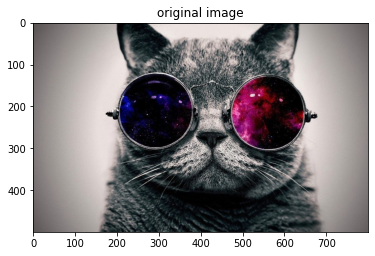

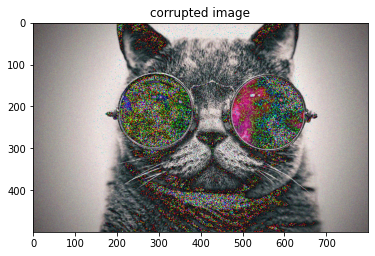

In [ ]:
img_noise = img+noise
img_noise = img_noise.astype(np.uint8)
plt_imshow(img, 'original image')
plt_imshow(img_noise, 'corrupted image')

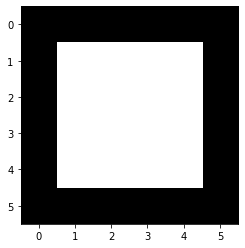

In [ ]:
image = np.zeros((6, 6, 1), np.uint8)
points = np.array([[1, 1], [1, 4], [4, 4], [4, 1]])
image = cv2.fillPoly(image, [points], 251)
plt.imshow(image, cmap='gray')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a021122-34da-482c-a2ea-1b10266af18e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>